## 1. Estudio del dataset (C)

La idea de este apartado es encapsular todo lo relacionado con el estudio del dataset. Pretendemos entender los datos con los que trabajamos de una manera tanto numérica como gráfica. También tenemos la intención de sacar conclusiones e ideas que nos guíen en los siguientes apartados.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn.preprocessing as preprocessing
from IPython.core.interactiveshell import InteractiveShell
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', 15)
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

Primeramente realizamos los imports que nos serán necesarios durante el estudio del dataset y además ajustamos algunas de las opciones tanto de panas, de matplotlib, como del notebook para que la visualización de los datos sea más cómoda.

In [2]:
originalDF = pd.read_csv('./Database/Concrete_Data_Yeh.csv', header=0, delimiter=',')

Cragamos el dataset en un dataframe de pandas usando la función para leer archivos .csv y nombramos la variable como "originalDF" ya que como realizaremos modificaciones sobre los datos nos interesa simepre tener disponible el original para poder usar esos datos sin modificar si fuera encesario.

In [3]:
originalDF.head()
originalDF.tail()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.000,0.000,0.000,162.000,2.500,1040.000,676.000,28,79.990
1,540.000,0.000,0.000,162.000,2.500,1055.000,676.000,28,61.890
2,332.500,142.500,0.000,228.000,0.000,932.000,594.000,270,40.270
3,332.500,142.500,0.000,228.000,0.000,932.000,594.000,365,41.050
4,198.600,132.400,0.000,192.000,0.000,978.400,825.500,360,44.300


,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
1025,276.400,116.000,90.300,179.600,8.900,870.100,768.300,28,44.280
1026,322.200,0.000,115.600,196.000,10.400,817.900,813.400,28,31.180
1027,148.500,139.400,108.600,192.700,6.100,892.400,780.000,28,23.700
1028,159.100,186.700,0.000,175.600,11.300,989.600,788.900,28,32.770
1029,260.900,100.500,78.300,200.600,8.600,864.500,761.500,28,32.400


Mostraos tanto los primeros 5 registros como los 5 últimos disponibles en nuestro dataset. De esta manera también vemos que disponemos de 1030 registros y un total de 9 variables.  
En la página de Kaggle del dataset (https://www.kaggle.com/maajdl/yeh-concret-data) ya está indicado, pero es evidente que nuestra variable objetivo será "csMPa". Esto hace referéncia a la fuerza compresiva del hormigón y, por tanto, es la variables más iteresante de intentar predecir.  
En la página de Kaggle se nos indica que absolutamente todos los valores, exceptuando "age" y "csMPa", usan las unidades kg/m3. En cuanto a "age" se encuentra en días (de 1 a 365) y en el caso de "csMPa", como es de suponer, se encuentra en megapascales (MPa).

In [4]:
originalDF.describe()
originalDF.isnull().sum()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000
mean,281.168,73.896,54.188,181.567,6.205,972.919,773.580,45.662,35.818
std,104.506,86.279,63.997,21.354,5.974,77.754,80.176,63.170,16.706
min,102.000,0.000,0.000,121.800,0.000,801.000,594.000,1.000,2.330
25%,192.375,0.000,0.000,164.900,0.000,932.000,730.950,7.000,23.710
50%,272.900,22.000,0.000,185.000,6.400,968.000,779.500,28.000,34.445
75%,350.000,142.950,118.300,192.000,10.200,1029.400,824.000,56.000,46.135
max,540.000,359.400,200.100,247.000,32.200,1145.000,992.600,365.000,82.600


cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

Usando el método "describe" de pandas obtenemos rápidamente una descripción estadística de cada una de las variables que forman nuestro dataset. También podemos ver que ninguna de las variables tiene valores nulos, lo cuál nunca está de más.  
Sin embargo, observamos también que los datos siguen escalas distintas, por lo tanto, sería conveniente que los normalizaramos o estandarizaramos los datos antes de seguir adelante. Por lo que hemos podido leer en distintos lugares (https://stackoverflow.com/a/54573558, https://medium.com/@rrfd/standardize-or-normalize-examples-in-python-e3f174b65dfc), la estandarización suele ser normalmente más beneficiosa que la normalización así que optaremos por ella.

In [5]:
standardScaler = preprocessing.StandardScaler()
stdDF = pd.DataFrame(standardScaler.fit_transform(originalDF))
stdDF.columns = originalDF.columns
stdDF.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000,1030.000
mean,-0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,-0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.715,-0.857,-0.847,-2.800,-1.039,-2.212,-2.241,-0.707,-2.006
25%,-0.850,-0.857,-0.847,-0.781,-1.039,-0.527,-0.532,-0.612,-0.725
50%,-0.079,-0.602,-0.847,0.161,0.033,-0.063,0.074,-0.280,-0.082
75%,0.659,0.801,1.002,0.489,0.669,0.727,0.629,0.164,0.618
max,2.478,3.311,2.281,3.066,4.354,2.214,2.733,5.058,2.802


Una vez tenemos el dataset estandarizado sigamos explorando. El siguiente paso que vamos a dar va a ser el de visualizar tanto las correlaciones entre cada variable (incluída 'scMPa', la variable objetivo) así como ver de que manera se distribuyen los puntos de cada variable de entrada respecto a la objetivo.  Para ello nos ayudaremos de los dos siguientes gráficos:

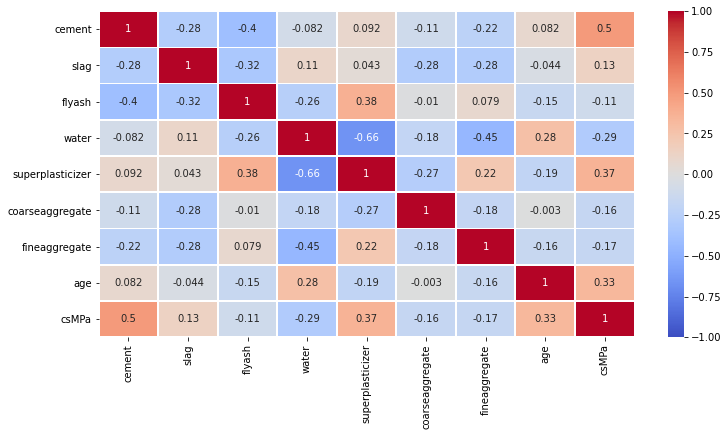

In [6]:
plt.figure(figsize = (12,6))
sns.heatmap(stdDF.corr(), annot=True, linewidths= .75, vmin=-1, vmax=1, cmap='coolwarm')
plt.show();

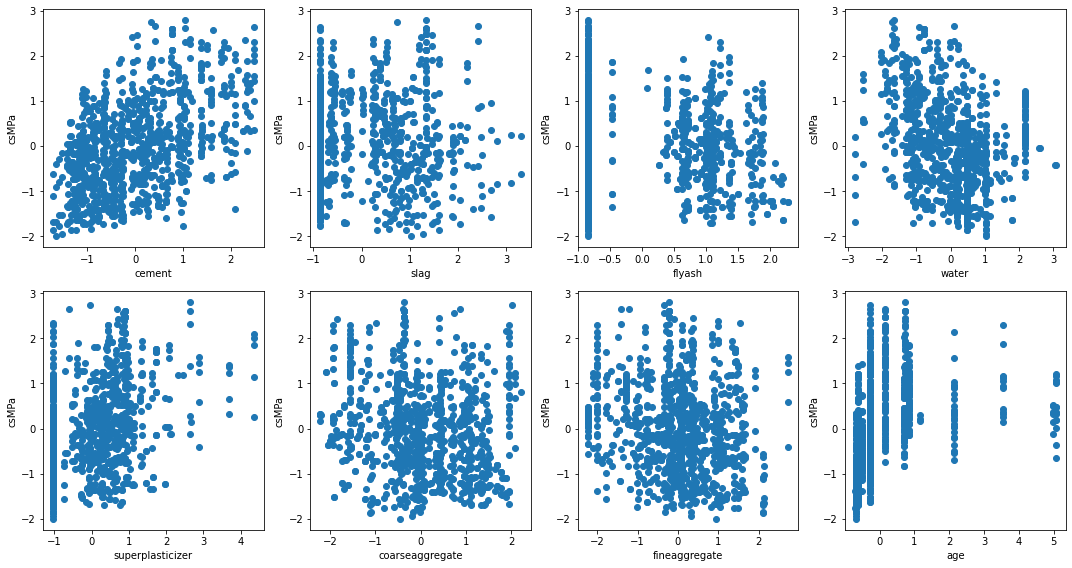

In [7]:
fig, axs = plt.subplots(2, 4, figsize=(15,8))

varIdx = 0
for x in range(2):
    for y in range(4):
        axs[x,y].set(xlabel=stdDF.columns[varIdx], ylabel='csMPa')
        axs[x,y].plot(stdDF[stdDF.columns[varIdx]], stdDF['csMPa'], 'o')
        varIdx+=1

fig.tight_layout()
plt.show();

De el primer gráfico podemos obtener información muy valiosa para nuestra regresión lineal, ya que nos indica que variables tienen una mayor correlación con la variable de salida. Estas son 'cement' con un 0.5, 'superlasticizer' con un 0.37, 'age' con un 0.33 y 'water' con una correlación negativa de 0.29.  
Sin embargo también vemos algunas correlaciones fuertes entre otras variables como 'water' y 'superplasticizer' que llegan a -0.66, u otras. Por lo tanto, los resultados obtenidos en ésta gráfica son orientativos pero no nos deben frenar de probar cosas con las demás variables más adelante.  
  
  
En cuanto a la segunda gráfica podemos observar, sobretodo, que algunas de nuestras variables tienen problemas. Vemos como 'slag', 'flyash',  y 'superplasticizer' acumulan muchos valores de 'csMPa' distintos al principio de las gráficas. Sin duda es algo a tener en cuenta y seguidamente lo estudiaremos más de cerca haciendo histogramas para las variables. A parte de eso, a simple vista podemos encontrar que, parecen haber algunar correlaciones pero también vemos demasiada dispersión en los puntos.

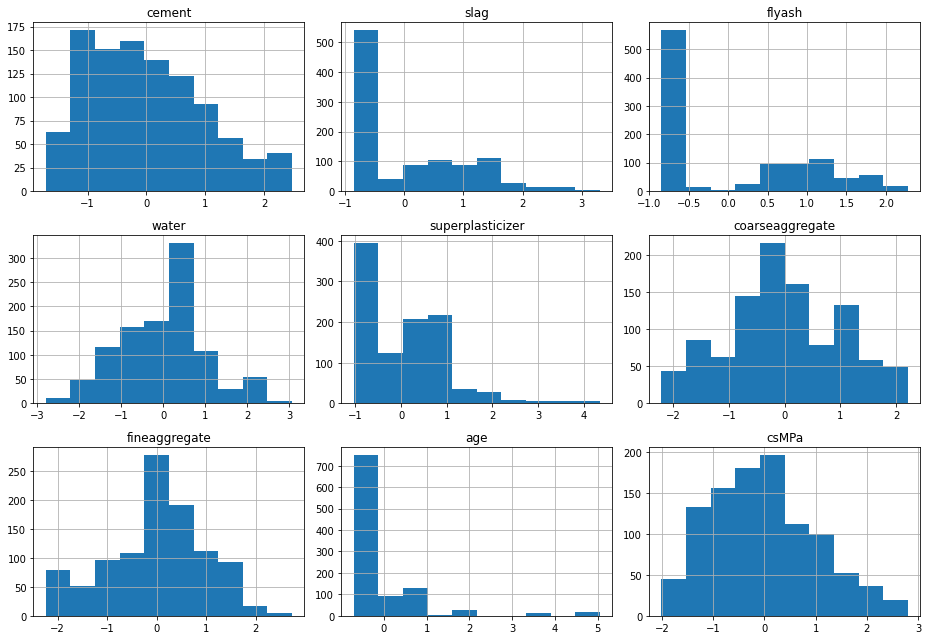

In [8]:
fig, axs = plt.subplots(3, 3)
varIdx = 0
for x in range(3):
    for y in range (3):
        plt.sca(axs[x,y])
        axs[x,y].set_title(stdDF.columns[varIdx])
        stdDF[stdDF.columns[varIdx]].hist(figsize=(13,9))
        varIdx+=1
fig.tight_layout()
plt.show();

Como habíamos comentado justo antes, observamos el problema de algunas variables que acumulan una gran cantidad de registros en el inicio de sus histogramas. Intentaremos atacar este problema de distintas maneras en el siguiente apartado para ver en que manera afecta al rendimiento de los modelos y si estos mejoran al modificar estos datos para paliar el problema.  
Sin embargo, creemos que si ignoráramos estas acumulaciones de registros que se visualizan al principio de los histogramas, no resultarían unas malas distribuciones.

## 2. Regresiones Lineales (B)

En este apartado pretendemos generar distintos modelos de regresión lineal que podamos comparar. La intención del experimento es ir realizando diferentes cambios en los datos que usaremos para entrenar los modelos con el objetivo de encontrar cuál es el mejor tratamiento de los datos para realizar una regresión lineal que predizca lo mejor posible la variable objetivo de nuestro dataset.  
Por lo tanto, para cada modelo que generemos y entrenemos con los datos de 'train', veremos que MSE obtiene en los datos de 'test' y usaremos esa medida para comparar los distintos modelos (a menor MSE, mejor).  
  
  Por lo tanto, el primer paso será generar estos datos de 'test' y 'train' ayudándonos de la librería sklearn.

In [9]:
from sklearn.model_selection import train_test_split
testSize = 0.2

Esta celda es especialmente importante ya no por la primera línea que simeplemente importa lo necesario para separar os datos en 'train' y 'test' sino por la segunda, que define el % del tamaño total de los datos que usaremos como 'test'.

In [10]:
xTrain, xTest, yTrain, yTest = train_test_split(stdDF.iloc[:,:8], stdDF.iloc[:,8:9], test_size=testSize, random_state=0)
xAll, yAll = stdDF.iloc[:,:8], stdDF.iloc[:,8:9]

Ahora ya tenemos los datos separados y listos para entrenar y probar los modelos.  
El valor de 'random_state' lo hemos fijado en 0 para que nuestros resultados puedas ser reproducibles facilmente. Esto es así ya que la función 'train_test_split' hace un 'shuffle' de los datos.

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
def getModelMSE(linearRegModel, xTestData, yTestData):
    predictedValues = linearRegModel.predict(xTestData)
    return np.square(predictedValues - yTestData).mean()

def plotModel(linearRegModel, xTest, yTest, xAll, yAll):
    testDataPredictions = linearRegModel.predict(xTest)
    allDataPredictions = linearRegModel.predict(xAll)
    testMSE = getModelMSE(linearRegModel, xTest, yTest)
    allMSE = getModelMSE(linearRegModel, xAll, yAll)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

    ax1.scatter(testDataPredictions, yTest, s=10)
    ax1.plot([yTest.min(), yTest.max()], [yTest.min(), yTest.max()], 'k--', lw=2)
    ax1.set_title(f"Valores de test \n MSE: {np.round(testMSE,3)}")
    ax1.set_xlabel("Predicciones")
    ax1.set_ylabel("Valores reales")

    ax2.scatter(allDataPredictions, yAll, s=10)
    ax2.plot([yAll.min(), yAll.max()], [yAll.min(), yAll.max()], 'k--', lw=2)
    ax2.set_title(f"Todos los valores \n MSE: {np.round(allMSE,3)}")
    ax2.set_xlabel("Predicciones")
    ax2.set_ylabel(f"Valores reales")

    ax1.axis('square')
    ax2.axis('square')
    plt.tight_layout()
    plt.show()

Estas son funciones que nos ayudarán a dar un valor a los modelos entrenados (MSE, a menor, mejor) así como a visualizarlos.

### - Un modelo con cada atributo

Nuestra intención es obtener el mejor modelo posible y para ello seguramente sea mejor entrenar un modelo que se base en múltiples variables para predecir la variable objetivo que no entrenar un modelo que se base en una únicamente. De todas formas, la práctica lo pide y siempre es un primer paso así que vamos a comparar los distintos modelos que obtenemos si usamos únicamente una variable como 'input' para predecir 'csMpa':

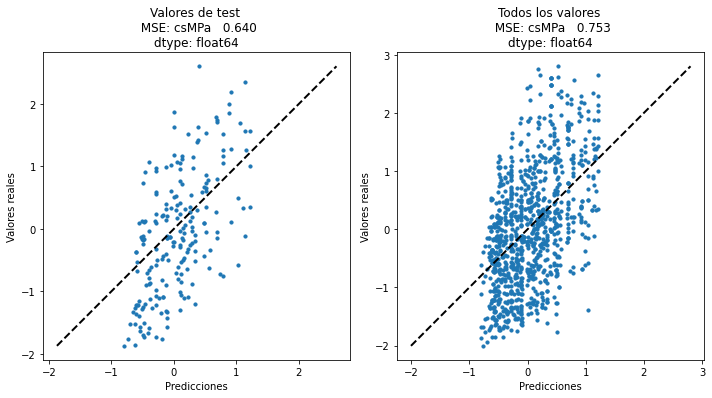

ValueError: illegal value in 4-th argument of internal None

In [14]:
mses = []
plots = []
for varName in xTrain.columns:
    current_xTrain = xTrain[varName].values.reshape(-1,1)
    current_yTrain = yTrain
    current_xTest = xTest[varName].values.reshape(-1,1)
    current_yTest = yTest
    model = LinearRegression().fit(current_xTrain, current_yTrain)
    mses.append(getModelMSE(model, current_xTest, current_yTest))
    plotModel(model, current_xTest, yTest, xAll[varName].values.reshape(-1,1), yAll);

In [15]:
mses = pd.DataFrame(np.asarray(mses), index=xTrain.columns.to_list(), columns=['MSE'])
mses.plot.barh();

ValueError: Shape of passed values is (1, 1), indices imply (8, 1)

Como era de esperar ninguno de los modelos es 'nada del otro mundo', el mejor de ellos es el que usa 'cement' para predecir 'csMPa', que obtiene un MSE alrededor del 0.6. Era de esperar ya que como hemos visto antes esta es la variable que más correlacionada estaba con la objetivo con un valor 0.5.  
Ahora vayamos a por modelos multivariables para intentar mejorar al máximo nuestra predicción.

### - Modelo base (Alias: 0)

Primeramente nos interesa cerar un modelo como 'baseline', este modelo lo crearemos sin aplicar ninguna modificación ni transformación en los datos de tal manera que nos sirva como referéncia para ver si los próximos modelos empeoran o mejora y cuanto empeoran o cuanto mejoran respecto a este primero.

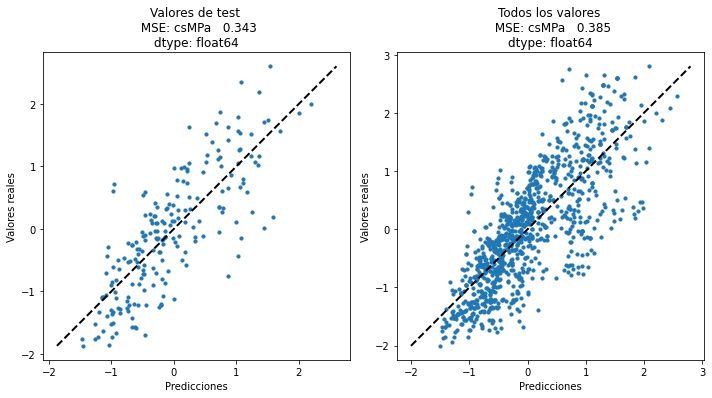

In [73]:
baseModel = LinearRegression().fit(xTrain, yTrain)
plotModel(baseModel, xTest, yTest, xAll, yAll)

### - Modelo con PCA (Alias: 1)

Este modelo no será muy diferente del modelo 1. Lo que haremos será elegir unas cuantas variables (en vez de todas) para entrenar el modelo y ver si obtenemos alguna mejora respecto al modelo 1.  
(SIGUE)

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(stdDF.iloc[:,:8])

PCAxTrain = principalComponents[:xTrain.shape[0], :]
PCAxTest = principalComponents[xTrain.shape[0]:, :]

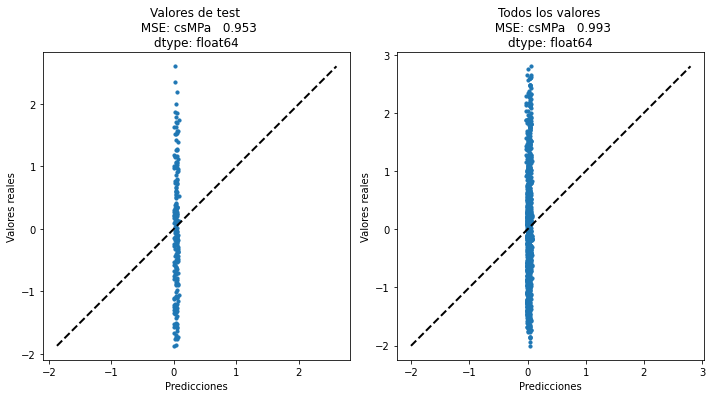

In [76]:
pcaModel = LinearRegression().fit(PCAxTrain, yTrain)
plotModel(pcaModel, PCAxTest, yTest, principalComponents, yAll)

Por alguna razón no hemos obtenido para nada buenos resultados, el modelo está concentrando todas las predicciones en valores muy cercanos al 0. No descartamos que podamos haber cometido algún error en la programación, pero revisando el código múltiples veces no parece ser el caso. Quizás el hecho de tener los datos tan desbalanceados en algunas de las variables ha afectado negativamente al PCA.

### - Modelo sólo con variables de distrbución normal (Alias: 2)

ANteriormente habíamos detectado que algunas variables ('slag', 'flyash', 'superplasticizer', 'age') tenían unas distribuciones nada adecuadas para la regresión lineal. Esta vez vamos a elegir 'a mano' las variables que utilizaremos para entrenar el modelo. Estas serán 'cement', 'water', 'fineaggregate' y 'coarseaggregate' ya que sguína unas buenas distribuciones en sus histogramas esperamos que sean buenas variables con las que entranar al modelo.

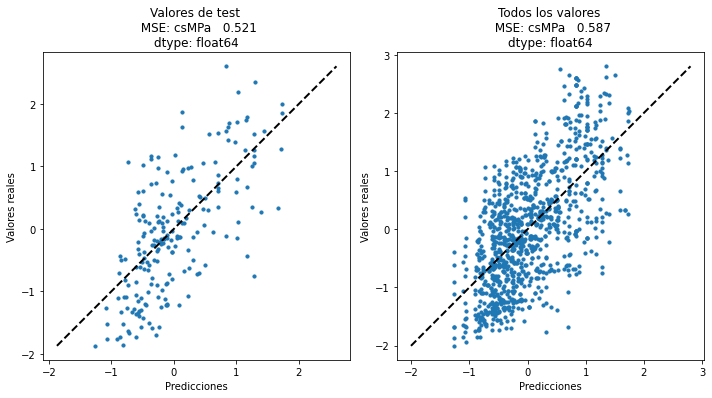

In [89]:
normModelxTrain = xTrain[['cement', 'water', 'fineaggregate', 'coarseaggregate']] 
normModelxTest = xTest[['cement', 'water', 'fineaggregate', 'coarseaggregate']] 

normModel = LinearRegression().fit(normModelxTrain, yTrain)
plotModel(normModel, normModelxTest, yTest, xAll[['cement', 'water', 'fineaggregate', 'coarseaggregate']], yAll)

Si bien el modelo no es desastroso, no alcanza el nivel del modelo 0, probablemente auqnue las variables que hemos escogido sigan distribuciones buenas, no tengan la suficiente correlación como para conseguir un modelo lo suficientemente preciso. Al fin y al cabo estamos prescindiendo de variables como 'superplasticizer' o 'age' que mostraban una alta correlación en comparación al resto.

# VOY POR AQUÍ!!!! (LO DE ABAJO NO ES FINAL)

----------------------------------------------------------------------------------------------------------------------

In [ ]:
qt = QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')
qtDF = pd.DataFrame(qt.fit_transform(originalDF))
qtDF.columns = originalDF.columns
qtDF.hist();
fig, axs = plt.subplots(4, 2, figsize=(14,12))

varIdx = 0
for x in range(4):
    for y in range(2):
        axs[x,y].set(xlabel=qtDF.columns[varIdx], ylabel='csMPa')
        axs[x,y].plot(qtDF[qtDF.columns[varIdx]], qtDF['csMPa'], 'o')
        varIdx+=1

fig.tight_layout()
plt.show;

In [ ]:
fig, axs = plt.subplots(3, 3)
varIdx = 0
for x in range(3):
    for y in range (3):
        plt.sca(axs[x,y])
        axs[x,y].set_title(originalDF.columns[varIdx])
        originalDF[originalDF.columns[varIdx]].hist(figsize=(13,9))
        varIdx+=1
fig.tight_layout()
plt.show();

Como suponíamos, hay un problema con las variables 'slag', 'flyash' y 'superplastizicer', además de 'age'. Estas variables acumulan muchos registros en el valor 0 y eso hace que no sigan una distribución beneficiosa para nuestro futuro modelo.  
Eso es así, seguramente, porque en muchas de las mezclas de hormigón simplemente no se añaden esos elementos y eso provoca estas distribuciones tan desbalanceadas.  
De todas maneras, veamos qué correlaciones encontramos por el momento con un gráfico adecuado para ello.